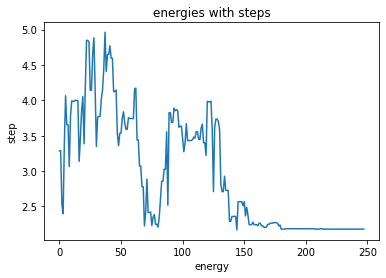

In [190]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

class TSP:
    def __init__(self, citys, k=0.9, K=100, l = 1, T0=168.14, Ts=0.01):
        self.citys = citys
        self.path = [i for i in range(len(citys))]
        # 设置退温参数，metropolis参数，初始温度，终止温度，内循环长度
        self.k = k
        self.K = K
        self.T = T0
        self.Ts = Ts
        self.L = l * len(citys)
        # 能量序列
        self.energies = []
        
    def cal_distance(self, path):
        energy = 0
        for i in range(len(path)):
            if i == len(path) - 1:
                energy += math.sqrt((self.citys[path[i]][0] - self.citys[path[0]][0]) ** 2 + \
                          (self.citys[path[i]][1] - self.citys[path[0]][1]) ** 2)
            else:
                energy += math.sqrt((self.citys[path[i]][0] - self.citys[path[i + 1]][0]) ** 2 + \
                          (self.citys[path[i]][1] - self.citys[path[i + 1]][1]) ** 2)
        return energy
    
    def new_solution(self):
        path = self.path.copy()
        i = random.randint(0, len(path) - 2)
        j = random.randint(i + 1, len(path) - 1)
        # 随机选择三种生成新解方法中的一种
        choice = random.randint(0, 2)
        # 交换
        if choice == 0:
            temp = path[j]
            path[j] = path[i]
            path[i] = temp
        # 逆转
        elif choice == 1:
            temp = path[i : j]
            temp.reverse()
            path = path[0 : i] + temp + path[j : ]
        # 插入
        else:
            temp = path[j]
            for x in np.arange(j, i, -1):
                path[x] = path[x - 1]
            path[i] = temp
        return path
            
    def loops(self):
        while self.T >= self.Ts:
            for _ in range(self.L): 
                e1 = self.cal_distance(self.path)
                new_path = self.new_solution()
                e2 = self.cal_distance(new_path)
                if e2 < e1:
                    self.path = new_path
                    self.energies.append(e2)
                else:
                    # metropolis能量准则
                    if math.exp(- self.K * (e2 - e1) / self.T) > random.random():
                        self.path = new_path
                        self.energies.append(e2)
            self.T = self.k * self.T
            
    def show_pic(self):
        plt.plot(range(len(tsp.energies)), tsp.energies)
        plt.title("energies with steps")
        plt.xlabel("energy")
        plt.ylabel("step")
        
if __name__ == "__main__":
    citys = [
        [0.4000, 0.2439],
        [0.1707, 0.2293],
        [0.5171, 0.4439],
        [0.1463, 0.2293],
        [0.7610, 0.9414],
        [0.8732, 0.6878],
        [0.8488, 0.6683],
        [0.6195, 0.6536],
        [0.5219, 0.3609],
        [0.2536, 0.2634],
    ]
    tsp = TSP(citys)
    tsp.loops()
    tsp.show_pic()